# Generate data from videos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/')
!ls && pwd

 07780635.pdf
 0x0409.ini
 1a.zip
 1b.zip
 2a.zip
 2b.zip
 3a.zip
 3b.zip
 4a.zip
 4b.zip
 5.1.12.tiff
 5a.zip
 5b.zip
 6a.zip
 6b.zip
 ADDINS.cab
 Arduino.apk
 as.gdoc
 blackbox_decrypt_files
'BlackBox Documentation.gdoc'
 bucc2018-fr-en.sample-gold
 ca2.glb
 CAD_Group-41.par
 ca.glb
 Certificates
 Classroom
'Colab Notebooks'
 COM_SE~1.cab
'Copy of ar_monastery.bsp'
'Copy of cs_assault.bsp'
'Copy of de_safehouse.nav'
'CS17BTECH11017 (1).pdf'
'CS17BTECH11017 (2).pdf'
'CS17BTECH11017 (3).pdf'
'CS17BTECH11017 (4).pdf'
'CS17BTECH11017_A1 (1).pdf'
'CS17BTECH11017_A1 (2).pdf'
 CS17BTECH11017_A1.pdf
 CS17BTECH11017_A2.pdf
 CS17BTECH11017_A3.pdf
'CS17BTECH11017_A4 (1).pdf'
 CS17BTECH11017_A4.pdf
 CS17BTECH11017_A5.pdf
 CS17BTECH11017_A6.pdf
 CS17BTECH11017_A7.pdf
 CS17BTECH11017_A8.pdf
'CS17BTECH11017-Essay (1).pdf'
'CS17BTECH11017-Essay (2).pdf'
 CS17BTECH11017-Essay.pdf
 CS17BTECH11017_hw0.ipynb
'CS17BTECH11017-hw1 (1).ipynb'
 CS17BTECH11017-hw1.ipynb
 CS17BTECH11017-hw2.ipynb
'CS17BTECH110

In [ ]:
! wget http://storage.googleapis.com/thumos14_files/UCF101_videos.zip

--2020-11-15 07:35:07--  http://storage.googleapis.com/thumos14_files/UCF101_videos.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6960400115 (6.5G) [binary/octet-stream]
Saving to: ‘UCF101_videos.zip’

UCF101_videos.zip   100%[===================>]   6.48G  37.4MB/s    in 4m 2s   

2020-11-15 07:39:10 (27.5 MB/s) - ‘UCF101_videos.zip’ saved [6960400115/6960400115]



In [ ]:
! unzip U*.zip
! ls U*

In [ ]:
os.mkdir('/content/drive/My Drive/MultiFrame/')
os.mkdir('/content/drive/My Drive/MultiFrame/train/')
os.mkdir('/content/drive/My Drive/MultiFrame/test/')

In [ ]:
import shutil
import glob
import matplotlib.pyplot as plt
import cv2

In [ ]:
os.listdir()

In [ ]:
# # os.chdir('UCF/')
# os.mkdir('train/')
# os.mkdir('test/')
import numpy as np
files = [file for file in os.listdir('/content/drive/My Drive/UCF101/') if os.path.isfile(os.path.join('/content/drive/My Drive/UCF101/', file))]
np.random.shuffle(files)
# print(files[0].split('_'))
actions={}
count={}
for file in files:
  act = file.split('_')[1]
  if act in actions:
    actions[act].append(file)
    count[act]+=1
  else:
    actions[act]=[file]
    count[act]=1
print(actions,'\n',count)

{'Biking': ['v_Biking_g09_c04.avi', 'v_Biking_g24_c04.avi', 'v_Biking_g03_c02.avi', 'v_Biking_g24_c05.avi', 'v_Biking_g18_c06.avi', 'v_Biking_g05_c02.avi', 'v_Biking_g09_c01.avi', 'v_Biking_g16_c03.avi', 'v_Biking_g07_c04.avi', 'v_Biking_g04_c04.avi', 'v_Biking_g07_c05.avi', 'v_Biking_g16_c01.avi', 'v_Biking_g11_c03.avi', 'v_Biking_g20_c06.avi', 'v_Biking_g19_c03.avi', 'v_Biking_g08_c05.avi', 'v_Biking_g06_c03.avi', 'v_Biking_g05_c01.avi', 'v_Biking_g17_c02.avi', 'v_Biking_g14_c01.avi', 'v_Biking_g10_c06.avi', 'v_Biking_g10_c02.avi', 'v_Biking_g03_c04.avi', 'v_Biking_g12_c01.avi', 'v_Biking_g02_c03.avi', 'v_Biking_g09_c02.avi', 'v_Biking_g21_c03.avi', 'v_Biking_g04_c03.avi', 'v_Biking_g25_c04.avi', 'v_Biking_g10_c04.avi', 'v_Biking_g21_c02.avi', 'v_Biking_g08_c03.avi', 'v_Biking_g24_c03.avi', 'v_Biking_g21_c05.avi', 'v_Biking_g05_c03.avi', 'v_Biking_g08_c06.avi', 'v_Biking_g03_c01.avi', 'v_Biking_g02_c02.avi', 'v_Biking_g23_c03.avi', 'v_Biking_g13_c05.avi', 'v_Biking_g20_c02.avi', 'v_B

In [ ]:
# files = [file for file in os.listdir('/content/drive/My Drive/Pix2Pix/dataset/UCF/train/') if os.path.isfile(os.path.join('/content/drive/My Drive/Pix2Pix/dataset/UCF/train/', file))]
# print(files[:3])

In [ ]:
!ls MultiFrame

test  train


In [ ]:
!rm -rf MultiFrame/train/*

In [ ]:
files = [file for file in os.listdir('/content/drive/My Drive/UCF/train/') if os.path.isfile(os.path.join('/content/drive/My Drive/UCF/train/', file))]
count=0
PATH = '/content/drive/My Drive/MultiFrame/train/'
for file in files:
  count+=1
  print(file,count)
  cap= cv2.VideoCapture(os.path.join('/content/drive/My Drive/UCF/train/', file))
  name = file.split('.')[0]
  for i in range(5):
      ret, frame = cap.read()
      if ret == False :
          break
      cv2.imwrite(PATH+str(name)+'_'+'input_'+str(i)+'.png',frame)
  
  ret, frame = cap.read()
  cv2.imwrite(PATH+str(name)+'_'+'real'+'.png',frame)

  cap.release()
cv2.destroyAllWindows()

In [ ]:
os.listdir('MultiFrame/train/')[200:300]

In [ ]:
a = os.listdir('/content/drive/My Drive/MultiFrame/train/')

In [ ]:
import cv2

In [ ]:
image = cv2.imread('MultiFrame/train/v_ApplyEyeMakeup_g09_c02_input_0.png')
print(image.shape)

(240, 320, 3)


# Utilities for image Manipulation

In [ ]:
# os.mkdir('/content/drive/My Drive/MultiFrame/train')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

import os
import time
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
from IPython import display

In [ ]:
def load(image_file):

  # fig,a =  plt.subplots(1,6)

  input_image = tf.io.read_file(image_file)
  input_image = tf.image.decode_png(input_image)
  input_image = tf.cast(input_image, tf.float32)
  
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  
  
  # a[0].imshow(input_image/255.0)

  # input_image = tf.reshape(input_image,shape=(height,width,3))

  for i in range(1,5):

    image_file = tf.strings.regex_replace(input=image_file,pattern='input_'+str(i-1),rewrite='input_'+str(i))

    input_image_i = tf.io.read_file(image_file)
    input_image_i = tf.image.decode_png(input_image_i)
    input_image_i = tf.cast(input_image_i, tf.float32)

    input_image_i = tf.image.resize(input_image_i, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    # a[i].imshow(input_image_i/255.0)

    # input_image_i = tf.reshape(input_image_i,shape=(1,height,width,3))


    input_image = tf.concat([input_image,input_image_i],axis=-1)




  real_file = tf.strings.regex_replace(input=image_file,pattern='input_4',rewrite='real')

  real_image = tf.io.read_file(real_file)
  real_image = tf.image.decode_png(real_image)
  real_image = tf.cast(real_image, tf.float32)

  # a[5].imshow(real_image/255.0)

  real_image = tf.image.resize(real_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)


  return input_image, real_image

In [ ]:
BUFFER_SIZE = 400
BATCH_SIZE = 4
IMG_WIDTH = 256
IMG_HEIGHT = 256
height = IMG_HEIGHT
width = IMG_WIDTH

In [ ]:
channels = 3
frames = 5

(240, 320, 3) (240, 320, 3)


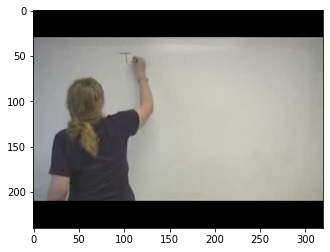

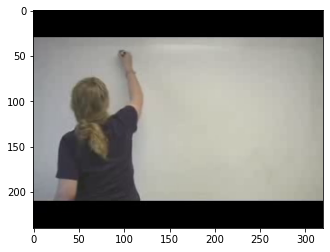

In [ ]:
PATH = '/content/drive/My Drive/MultiFrame/'
vidpath = '/content/drive/My Drive/pix2pix-video/UCF/'
fname = PATH+'train/v_WritingOnBoard_g17_c01.avi3342_input.png'
inp, re = load(fname)
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp[:,:,:3]/255.0)
plt.figure()
plt.imshow(re/255.0)
print(inp.shape,re.shape)
# print(inp-re)

In [ ]:
def resize(input_image, real_image, height, width):

  print(input_image.shape,real_image.shape)

  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [ ]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [ ]:
# normalizing the images to [-1, 1]

def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

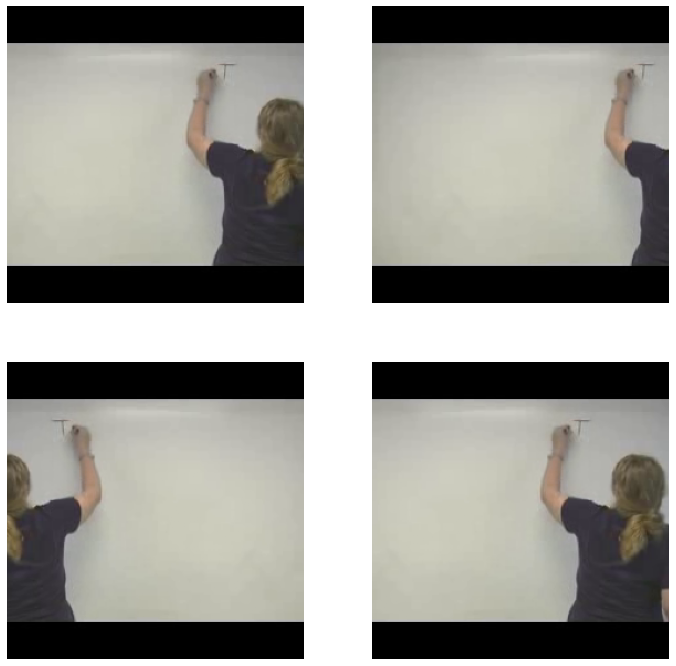

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(4):
  rj_inp, rj_re = random_jitter(inp, re)
  plt.subplot(2, 2, i+1)
  plt.imshow(rj_inp/255.0)
  plt.axis('off')
plt.show()

In [ ]:
def load_image_train(image_file):
  # print(image_file)
  input_image, real_image = load(image_file)
  # input_image, real_image = resize(input_image, real_image,
                                  #  IMG_HEIGHT, IMG_WIDTH)
  # input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
def load_image_train(image_file):
  # print(image_file)
  input_image, real_image = load(image_file)
  # input_image, real_image = resize(input_image, real_image,
                                  #  IMG_HEIGHT, IMG_WIDTH)
  # input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  # input_image, real_image = resize(input_image, real_image,
  #                                  IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

## Input Pipeline

In [ ]:
train_dataset = tf.data.Dataset.list_files(PATH+'train/*input*.png')
train_dataset = train_dataset.map(load_image_train)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [ ]:
test_dataset = tf.data.Dataset.list_files(PATH+'test/*input*.png')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Generator

In [ ]:
OUTPUT_CHANNELS = 3

In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [ ]:
print(inp.shape)
down_model = downsample(15, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(256, 256, 15)
(1, 128, 128, 15)


In [ ]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False,data_format='channels_last'))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [ ]:
up_model = upsample(15, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 15)


In [ ]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,15]) # initially 256 256 3

  down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64) - (bs,128,512,64)
    downsample(128, 4), # (bs, 64, 64, 128) - (bs,64,256,128)
    downsample(256, 4), # (bs, 32, 32, 256) - (bs,32,128,256)
    downsample(512, 4), # (bs, 16, 16, 512) - (16,64,512)
    downsample(512, 4), # (bs, 8, 8, 512) -   (8,32,512)
    downsample(512, 4), # (bs, 4, 4, 512)       (4,16,512)
    downsample(512, 4), # (bs, 2, 2, 512)       (2,8,512)
    downsample(512, 4), # (bs, 1, 1, 512)   -  (1,4,512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4), # (bs, 16, 16, 1024)
    upsample(256, 4), # (bs, 32, 32, 512)
    upsample(128, 4), # (bs, 64, 64, 256)
    upsample(64, 4), # (bs, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh') # (bs, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

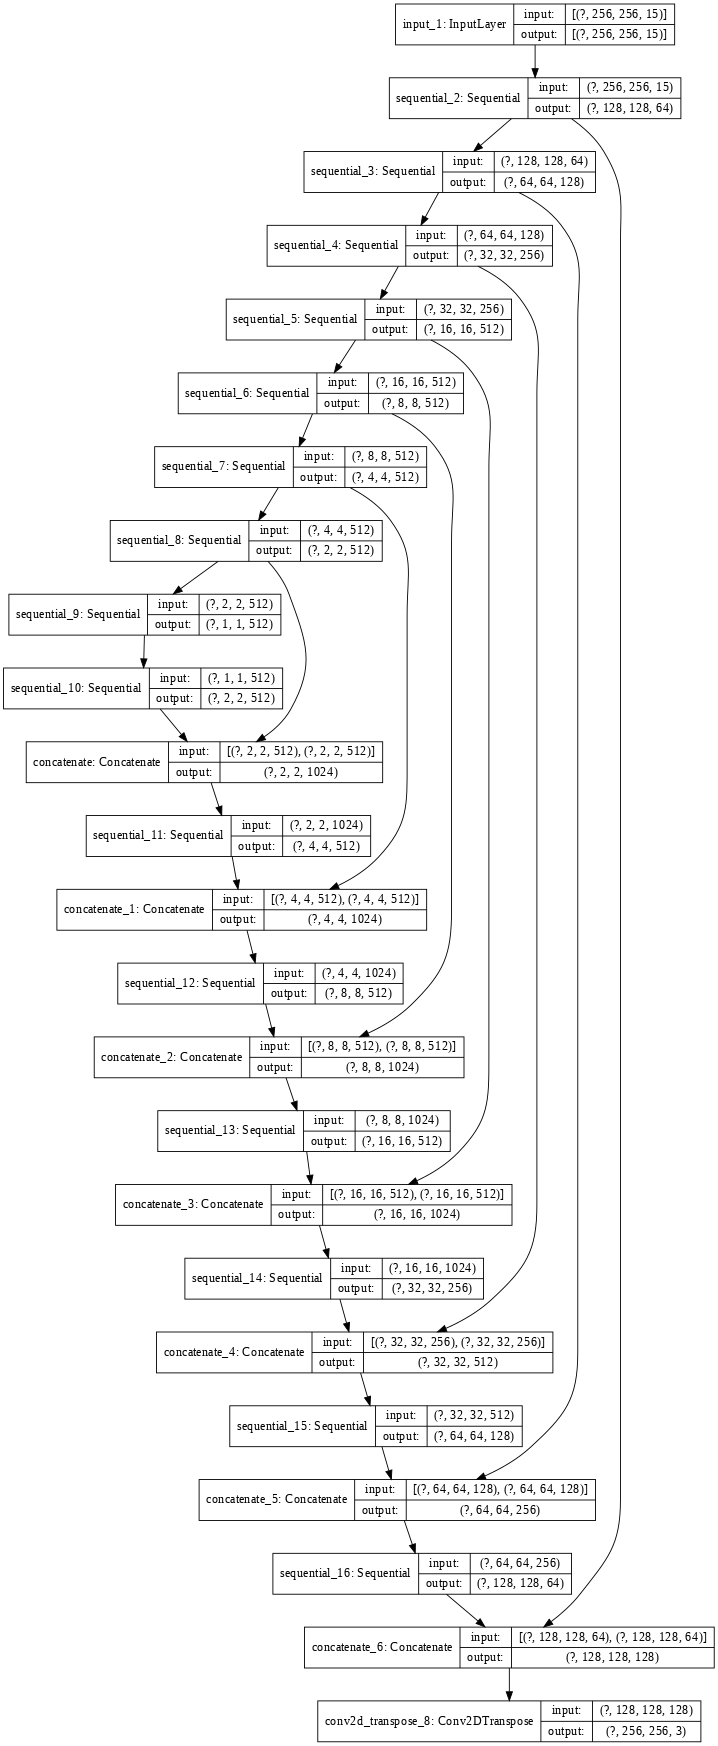

In [ ]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


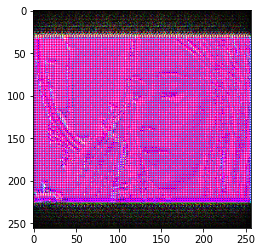

In [ ]:
gen_output = generator(inp[tf.newaxis,...], training=False)
plt.imshow(gen_output[0,...])

In [ ]:
LAMBDA = 100

In [ ]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  #MSE
  l2_loss = tf.reduce_mean(tf.math.squared_difference(target,gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss) + l2_loss

  return total_gen_loss, gan_loss, l1_loss,l2_loss

## Discriminator

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 15], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
  down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
  down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

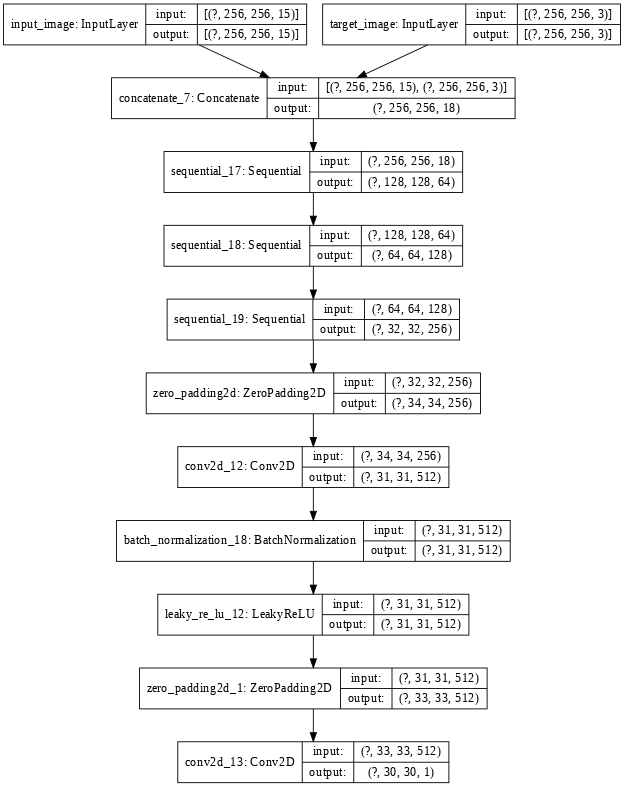

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

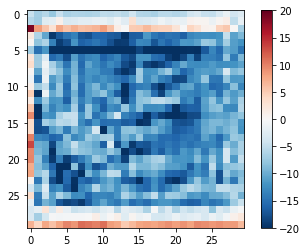

In [ ]:
disc_out = discriminator([inp[tf.newaxis,...], gen_output], training=False)
plt.imshow(disc_out[0,...,-1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

**Discriminator loss**
  

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss# + real_loss_2 + generated_loss_2

  return total_disc_loss

## Optimizers and Checkpoint


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

In [ ]:
checkpoint_dir = './training_checkpoints-'+'20201020-'+str(LAMBDA)+str(BATCH_SIZE)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Generate Images

In [ ]:
def generate_images_initial(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  print('Started Generating Initial Images')
  display_list = [test_input[0][:,:,:3], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  print('Started Generating Images')
  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  
  for i in range(4):
    plt.subplot(1,6,i+1)
    plt.title('Image '+str(i)+' ')
    plt.imshow(input[:,:,i*3:(i*3)+3]*0.5 + 0.5)


  for i in range(1,3):
    plt.subplot(1, 6, i+4)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

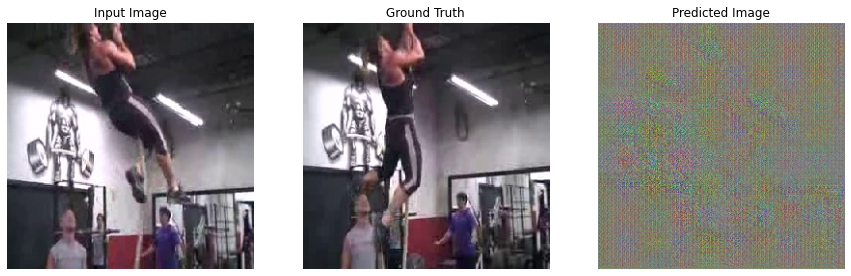

In [ ]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

## Training

In [ ]:
EPOCHS = 150

In [ ]:
import datetime
log_dir="logs-video/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" +'20201020-'+str(LAMBDA)+'-'+str(BATCH_SIZE))

In [ ]:
@tf.function
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss,gen_l2_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  # if epoch%2==0:
  #   discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
  #                                             discriminator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l2_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)
  return gen_total_loss, gen_gan_loss, gen_l1_loss,gen_l2_loss

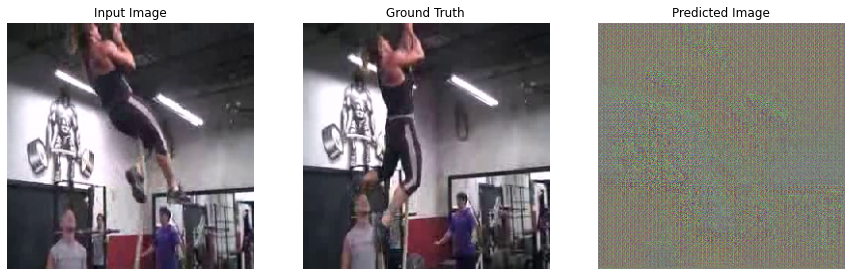

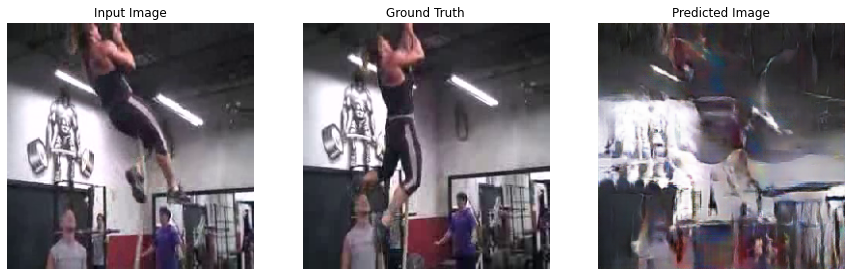

In [ ]:
generate_images(generator, example_input, example_target)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
generate_images(generator, example_input, example_target)

In [ ]:
def fit(train_ds, epochs, test_ds,epoch_done):
  checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
  for epoch in range(epoch_done,epochs):
    start = time.time()

    display.clear_output(wait=True)

    for example_input, example_target in test_ds.take(1):
      generate_images(generator, example_input, example_target)
    print("Epoch: ", epoch)

    # Train
    for n, (input_image, target) in train_ds.enumerate():
      print('.', end='')
      if (n+1) % 200 == 0:
        print(n+1)
      gen_total_loss, gen_gan_loss, gen_l1_loss,gen_l2_loss = train_step(input_image, target, epoch)
    print()



    # saving (checkpoint) the model every 20 epochs
    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
  checkpoint.save(file_prefix = checkpoint_prefix)

In [ ]:
#docs_infra: no_execute
%load_ext tensorboard
%tensorboard --logdir {log_dir}

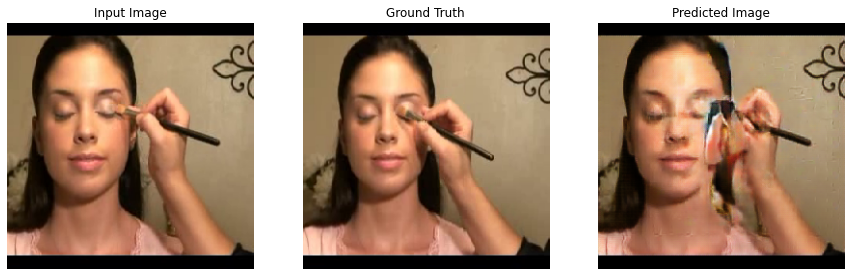

Epoch:  3
.......................................................................................................................................................................................................tf.Tensor(200, shape=(), dtype=int64)
........................................................................................................................................................................................................tf.Tensor(400, shape=(), dtype=int64)
........................................................................................................................................................................................................tf.Tensor(600, shape=(), dtype=int64)
........................................................................................................................................................................................................tf.Tensor(800, shape=(), dtype=int64)
.......................................

In [ ]:
fit(train_dataset, EPOCHS, test_dataset,0)